In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

dataFrame = pd.DataFrame(pd.read_csv('dataStore.csv', encoding='ISO-8859-1'))
#hay que definir la celda indice de nuestra base
dataFrame = dataFrame.set_index('Row ID')
dataFrame.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [3]:
#Aqui tenemos que hacer una limpieza o bueno adecuar el tipo de dato
dataFrame = dataFrame.convert_dtypes()
dataFrame.dtypes


Order ID         string[python]
Order Date       string[python]
Ship Date        string[python]
Ship Mode        string[python]
Customer ID      string[python]
Customer Name    string[python]
Segment          string[python]
Country          string[python]
City             string[python]
State            string[python]
Postal Code               Int64
Region           string[python]
Product ID       string[python]
Category         string[python]
Sub-Category     string[python]
Product Name     string[python]
Sales                   Float64
Quantity                  Int64
Discount                Float64
Profit                  Float64
dtype: object

In [4]:
#Aqui tenemos que hacer una limpieza o bueno adecuar el tipo de dato
dataFrame['Ship Date'] = pd.to_datetime(
    dataFrame['Ship Date'],
    dayfirst= True,
    errors='coerce'
)
dataFrame['Order Date'] = pd.to_datetime(
    dataFrame['Order Date'],
    dayfirst= True,
    errors= 'coerce'
)
dataFrame.dtypes

Order ID         string[python]
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode        string[python]
Customer ID      string[python]
Customer Name    string[python]
Segment          string[python]
Country          string[python]
City             string[python]
State            string[python]
Postal Code               Int64
Region           string[python]
Product ID       string[python]
Category         string[python]
Sub-Category     string[python]
Product Name     string[python]
Sales                   Float64
Quantity                  Int64
Discount                Float64
Profit                  Float64
dtype: object

In [5]:
#Agrupar los nombres 
dataFrame['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: Int64

C:\Users\axelb\AppData\Local\Temp\ipykernel_22436\813679731.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  dataFrame['Category'].value_counts().plot(kind='bar',fontsize=12,color=[plt.cm.get_cmap('tab10')(i / len(dataFrame['Category'].unique())) for i in range(len(dataFrame['Category'].unique()))])


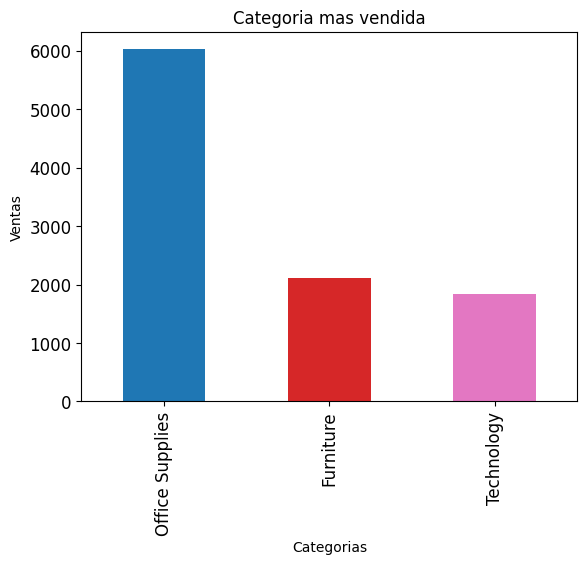

In [6]:
#Graficar
dataFrame['Category'].value_counts().plot(kind='bar',fontsize=12,color=[plt.cm.get_cmap('tab10')(i / len(dataFrame['Category'].unique())) for i in range(len(dataFrame['Category'].unique()))])
plt.xlabel('Categorias')
plt.ylabel('Ventas')
plt.title('Categoria mas vendida')
plt.show()


C:\Users\axelb\AppData\Local\Temp\ipykernel_22436\684607476.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  csFilter.sort_values().plot(kind='barh', figsize=(20,10), fontsize=18, color=[plt.cm.get_cmap('tab10')(i/len(csFilter)) for i in range(len(csFilter))])


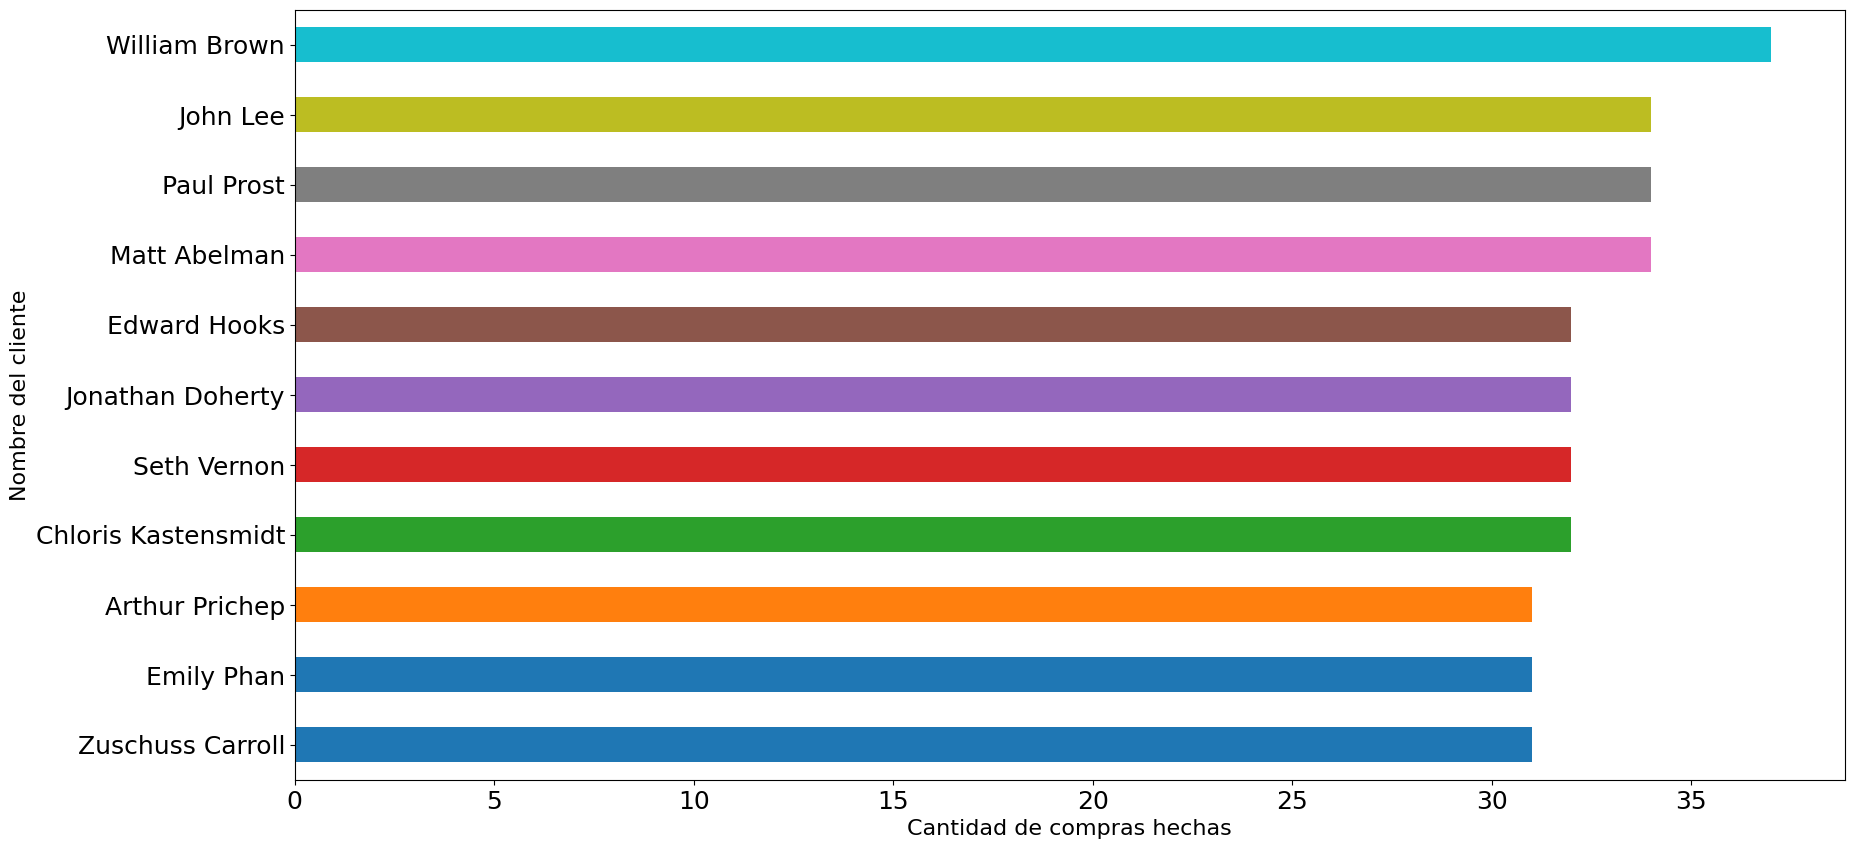

In [8]:
#2 ejercicio
cs = dataFrame['Customer Name'].value_counts()
csFilter = cs[cs > 30]
csFilter.sort_values().plot(kind='barh', figsize=(20,10), fontsize=18, color=[plt.cm.get_cmap('tab10')(i/len(csFilter)) for i in range(len(csFilter))])
plt.xlabel('Cantidad de compras hechas', fontsize= 16)
plt.ylabel('Nombre del cliente', fontsize=16)
plt.show()